In [1]:
import math as m

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import special
from pylab import *
%matplotlib inline

from src import billiard_quarterClass as bc
from src import curveClass as cv
from src import spectrumUtilities as su
#from src import verginiSaraceno as vs
#from src import planeWaveDecomposition as pwd

In [2]:
# line
def line_r(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    x = (x1-x0) * t + x0 
    y = (y1-y0) * t + y0
    return x, y

def line_n(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    nx = (y1 - y0)/l
    ny = (x0 - x1)/l
    return nx, ny

def line_arc(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    return t * l

# circle arc
def circle_r(t, R = 1, x0 = 0, y0 = 0, angle = 2*np.pi, shift = 0):
    x = x0 + R * np.cos(t*angle + shift)
    y = y0 + R * np.sin(t*angle + shift)
    return x, y

def circle_n(t, angle = 2*np.pi, shift = 0, **kwargs):
    nx = np.cos(t*angle + shift)
    ny = np.sin(t*angle + shift)
    return nx, ny

def circle_arc(t, R = 1, angle = 2*np.pi, **kwargs):
    return  R * angle *t

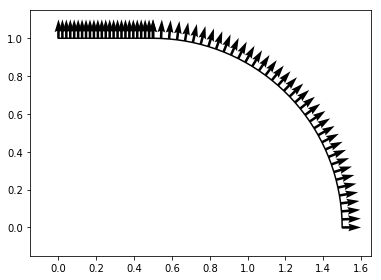

In [3]:
eps = 0.5
params_1 = {"x0" : eps, "y0" : 1, "x1" : 0, "y1": 1 }
line = cv.curve(line_r, line_n, line_arc, **params_1)
params_2 = {"angle" : np.pi/2, "x0" : eps}
circle = cv.curve(circle_r, circle_n, circle_arc, **params_2)

curves = [circle, line]
area = 0.25 * np.pi + eps
dens = [10 for i in curves]
dens[1] =20
stadiumBilliard = bc.billiard_quarter(curves, area, point_densities= dens)
stadiumBilliard.plot_boundary(M =5)

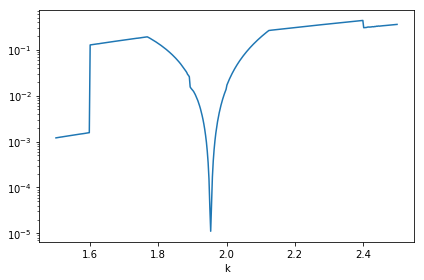

In [4]:
k1 = 1.50
k2 = 2.50
sym = 0
stadiumBilliard.plot_tension( k1, k2, sym, N = 200, grid = 400)

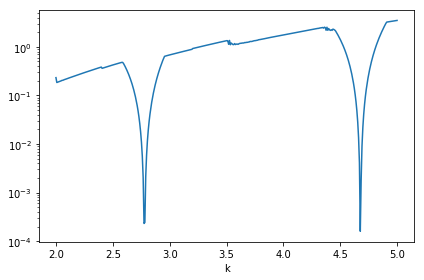

In [5]:
k1 = 2.0
k2 = 5.0
sym = 2
stadiumBilliard.plot_tension( k1, k2, sym, N = 200, grid = 400)

In [6]:
k0 = 1.9
dk = 0.1
N = 400
sym = 0
VSresult = stadiumBilliard.scaling_eigenvalues(N, k0, dk, sym)
print(VSresult)

[1.95324805]


     fun: 1.0500086001692848e-05
 message: 'Solution found.'
    nfev: 19
  status: 0
 success: True
       x: 1.953828456320102


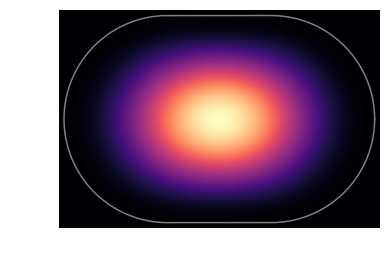

In [7]:
k0 = 1.9
dk = 0.1
N = 400
sym = 0
PWDresult = stadiumBilliard.PWD_eigenvalue(N, k0, dk, sym)
print(PWDresult)
stadiumBilliard.plot_probability( PWDresult.x, sym, plot_full=True)

     fun: 7.499916851706774e-05
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 3.403742635690464


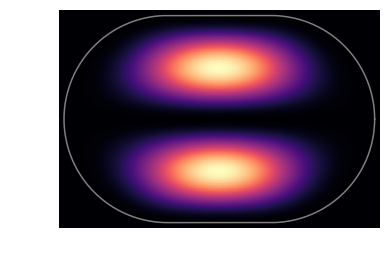

In [8]:
k0 = 3.4
dk = 0.1
N = 400
sym = 1
PWDresult = stadiumBilliard.PWD_eigenvalue(N, k0, dk, sym)
print(PWDresult)
stadiumBilliard.plot_probability( PWDresult.x, sym, plot_full=True)

     fun: 6.3263375744302072e-06
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 2.7781449533624913


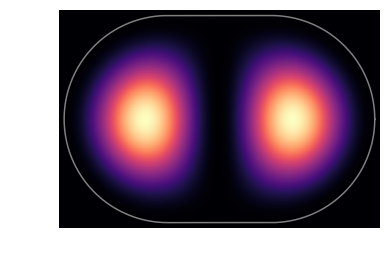

In [9]:
k0 =2.7
dk = 0.1
N = 400
sym = 2
PWDresult = stadiumBilliard.PWD_eigenvalue(N, k0, dk, sym)
print(PWDresult)
stadiumBilliard.plot_probability( PWDresult.x, sym, plot_full=True)

     fun: 8.673808940924937e-05
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 4.056364993916164


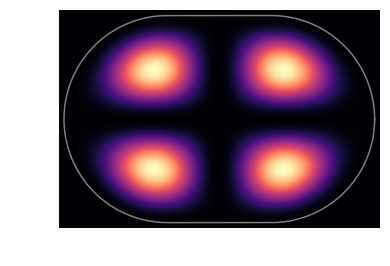

In [9]:
k0 = 4.0
dk = 0.1
N = 400
sym = 3
PWDresult = stadiumBilliard.PWD_eigenvalue(N, k0, dk, sym)
print(PWDresult)
stadiumBilliard.plot_probability( PWDresult.x, sym, plot_full=True)

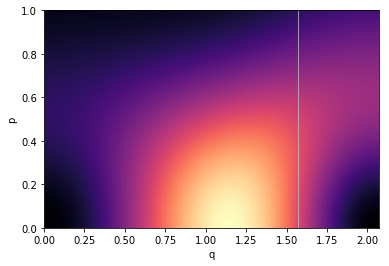

In [10]:
stadiumBilliard.plot_Husimi_function(PWDresult.x,sym)

In [11]:
k0 = 40.4
dk = 0.1
N = 600
sym = 0
VSresult = stadiumBilliard.scaling_eigenvalues(N, k0, dk, sym)
print(VSresult)

[40.32884626]


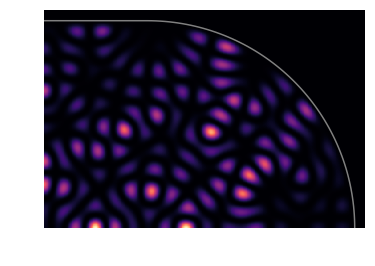

In [12]:
stadiumBilliard.plot_probability(VSresult[0],sym)

     fun: 0.00020255871546749263
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 40.32907638264853


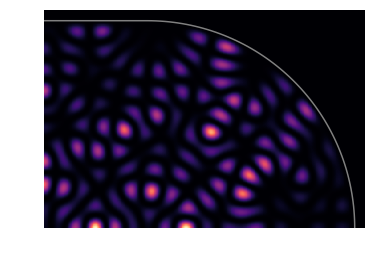

In [13]:
k0 = 40.4
dk = 0.1
N = 600
sym = 0
PWDresult = stadiumBilliard.PWD_eigenvalue(N, k0, dk,sym)
print(PWDresult)
stadiumBilliard.plot_probability(PWDresult.x, sym)

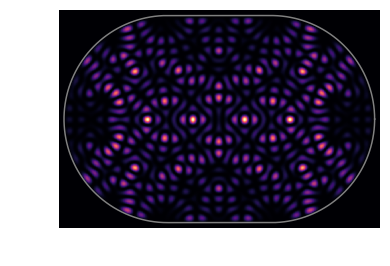

In [14]:
stadiumBilliard.plot_probability(PWDresult.x, sym, plot_full=True)

In [15]:
def computeSpectrum(self, sym, k0, dk, n):
    VSMIN = 100 
    N = max(3 * m.ceil((k0+n*dk)/ 4), VSMIN)
    spek_fun = lambda x : self.scaling_eigenvalues(N, x, dk, sym)
    return  su.computeSpectrum(k0, dk, n, spek_fun)

In [16]:
sym = 0
k0 = 150
dk = 0.1
n = 20
spectrum = computeSpectrum(stadiumBilliard, sym, k0, dk, n)

In [17]:
spectrum

array([150.02389257, 150.07932627, 150.0962868 , 150.12303938,
       150.1575159 , 150.16478448, 150.21007785, 150.23721185,
       150.28246867, 150.28588914, 150.29380874, 150.34316113,
       150.40723159, 150.43585982, 150.46504834, 150.48975649])

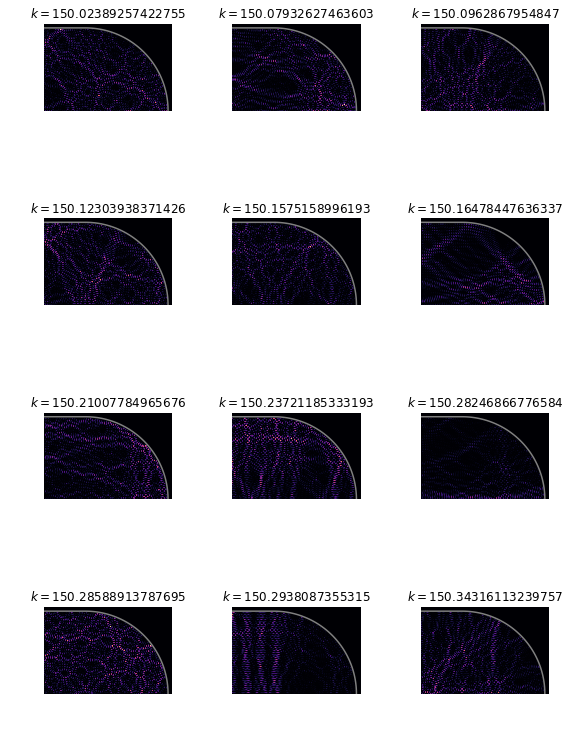

In [18]:
fig = plt.figure(figsize = (8,11))
j = 1
for k in spectrum[:12]:
    plt.subplot(4,3,j)
    j = j+1
    stadiumBilliard.plot_probability(k, sym, plot_full=False)    
    plt.title(r"$k = %s$" %k)
plt.tight_layout()

In [20]:
fig.savefig("wavefunctions.png", bbox_inches = "tight")